In [3]:
import pandas as pd 
import seaborn as sb


In [4]:
file = 'mtcars.csv'
df = pd.read_csv(file)
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.shape

(32, 12)

<AxesSubplot:>

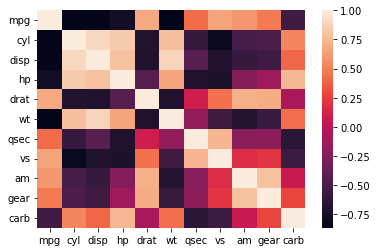

In [6]:
sb.heatmap(df.corr())

In [7]:
df.corr().mpg 

mpg     1.000000
cyl    -0.852162
disp   -0.847551
hp     -0.776168
drat    0.681172
wt     -0.867659
qsec    0.418684
vs      0.664039
am      0.599832
gear    0.480285
carb   -0.550925
Name: mpg, dtype: float64

In [8]:
df_linear = df.loc[:, ['carb','am','vs','wt','drat','hp','disp','cyl','mpg']]
df_linear.head()

,carb,am,vs,wt,drat,hp,disp,cyl,mpg
0,4,1,0,2.620,3.90,110,160.0,6,21.0
1,4,1,0,2.875,3.90,110,160.0,6,21.0
2,1,1,1,2.320,3.85,93,108.0,4,22.8
3,1,0,1,3.215,3.08,110,258.0,6,21.4
4,2,0,0,3.440,3.15,175,360.0,8,18.7


In [9]:
import scipy as sp 

from scipy import stats

In [10]:



print('skew',df_linear.skew())

print('\nkurtosis',df_linear.kurtosis())

skew carb    1.157091
am      0.400809
vs      0.264542
wt      0.465916
drat    0.292780
hp      0.799407
disp    0.420233
cyl    -0.192261
mpg     0.672377
dtype: float64

kurtosis carb    2.020059
am     -1.966550
vs     -2.063273
wt      0.416595
drat   -0.450432
hp      0.275212
disp   -1.067523
cyl    -1.762794
mpg    -0.022006
dtype: float64


In [11]:
df_nor = df_linear.loc[:,['carb','vs','wt','drat','hp','disp','mpg']]
df_nor.head()

,carb,vs,wt,drat,hp,disp,mpg
0,4,0,2.620,3.90,110,160.0,21.0
1,4,0,2.875,3.90,110,160.0,21.0
2,1,1,2.320,3.85,93,108.0,22.8
3,1,1,3.215,3.08,110,258.0,21.4
4,2,0,3.440,3.15,175,360.0,18.7


In [12]:
df_nor.corr()

,carb,vs,wt,drat,hp,disp,mpg
carb,1.000000,-0.569607,0.427606,-0.090790,0.749812,0.394977,-0.550925
vs,-0.569607,1.000000,-0.554916,0.440278,-0.723097,-0.710416,0.664039
wt,0.427606,-0.554916,1.000000,-0.712441,0.658748,0.887980,-0.867659
drat,-0.090790,0.440278,-0.712441,1.000000,-0.448759,-0.710214,0.681172
hp,0.749812,-0.723097,0.658748,-0.448759,1.000000,0.790949,-0.776168
disp,0.394977,-0.710416,0.887980,-0.710214,0.790949,1.000000,-0.847551
mpg,-0.550925,0.664039,-0.867659,0.681172,-0.776168,-0.847551,1.000000


In [13]:
df_col = df_nor.loc[:,['drat','hp','mpg']]

df_col.head()

,drat,hp,mpg
0,3.90,110,21.0
1,3.90,110,21.0
2,3.85,93,22.8
3,3.08,110,21.4
4,3.15,175,18.7


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hp', ylabel='Density'>

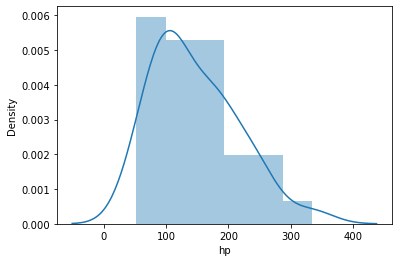

In [14]:
# seperating predictors and target

# from numpy import reshape
# X =df_col.loc[:,['carb','vs','drat','hp','disp']]
# y = df_col.mpg
# X
# Y
# print(X.shape)
# X = X = X.transpose()
# print(X.shape)
# print(y.shape)

# Visually respresenting this for 'hp'

import seaborn as sb
%matplotlib inline
sb.distplot(df.hp)

In [15]:
X = df_col.loc[:,['drat','hp']]
y = df_col['mpg']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =40)

In [17]:
X_test

,drat,hp
2,3.85,93
13,3.07,180
17,4.08,66
28,4.22,264
16,3.23,230
26,4.43,91
22,3.15,150


In [18]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("y_train shape:", y_train.shape)
print("y_train shape:", y_test.shape)

X_train shape: (25, 2)
X_test shape: (7, 2)
y_train shape: (25,)
y_train shape: (7,)


In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# model.fit_transform(y_test.values.tolist())
model.fit(X_train, y_train)

LinearRegression()

In [20]:

y_predict = model.predict(X_test)

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score (y_test, y_predict)*100

82.54392056502034

In [23]:
df_col

,drat,hp,mpg
0,3.90,110,21.0
1,3.90,110,21.0
2,3.85,93,22.8
3,3.08,110,21.4
4,3.15,175,18.7
5,2.76,105,18.1
6,3.21,245,14.3
7,3.69,62,24.4
8,3.92,95,22.8
9,3.92,123,19.2


In [24]:
# y_test.head(), y_predict[0:5]
# X_train.head()


# df_col.plot(kind="box")
# # checking for the outlier of hp 

# df_col.mpg.max()
# print(df['mpg'].isin([33.9]))
# df_fnl = df_col.drop(index=[30,19])

# df_fnl.plot(kind="box")
# %matplotlib inline
# sb.distplot(df_col)
# X = df_fnl.loc[:,['drat','hp']]
# y = df_fnl['mpg']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state =40)
# X_test
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)

# print("y_train shape:", y_train.shape)
# print("y_train shape:", y_test.shape)
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# # model.fit_transform(y_test.values.tolist())
# model.fit(X_train, y_train)

# y_predict = model.predict(X_test)
# from sklearn.metrics import r2_score
# r2_score (y_test, y_predict)*100

In [25]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [26]:
pwd

'd:\\Datamites\\Restarting Datamites 31-5-22\\machine_learning\\linear regression'